## Regression assignment

In [1]:
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import numpy.random as rnd
import os.path

# to make this notebook's output stable across runs
rnd.seed(4)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."

def save_fig(fig_id, tight_layout=True):
    image_dir = os.path.join(PROJECT_ROOT_DIR, "images")
    if not os.path.exists(image_dir):
        os.makedirs(image_dir)
    path = os.path.join(image_dir, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

## Loading the data 

This is Kaggle data on California housing which has been copied to my website to evade updates.

In [62]:
import pandas as pd
HOUSING_PATH = "http://gawron.sdsu.edu/housing.csv"
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = housing_path#os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [63]:
df = load_housing_data()
#  We need no NaNs for what follows.  This is 
#  a big hammer, but put probably ok for what we're doing
df.fillna(0)
print(df.shape)
df

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## The data

Use `scale` from `sklearn.preprocessing`. This will 
center to the mean and scale column by column to unit variance.


**Arguments:**

*X   {array-like, sparse matrix} of shape (n_samples, n_features)*

    The data to center and scale.

*axis  int, default=0*

    axis used to compute the means and standard deviations along. If 0, independently standardize each feature, otherwise (if 1) standardize each sample.

*with_mean   bool, default=True*

    If True, center the data before scaling.

*with_stdbool, default=True*

    If True, scale the data to unit variance (or equivalently, unit standard deviation).

copybool, default=True

    set to False to perform inplace row normalization and avoid a copy (if the input is already a numpy array or a scipy.sparse CSC matrix and if axis is 1).


**Returns**

*X_tr{ndarray, sparse matrix} of shape (n_samples, n_features)*

    The transformed data.


In [11]:
import numpy as np
from sklearn.preprocessing import scale

X,Y = df.median_income.values, df.median_house_value.values
Z = np.vstack([X,Y]).T
print("Med. Inc.|Med. Hou. |Z shape | Samp. Inc. | Samp. Hou.| Samp. Z")
print(X.shape,Y.shape,Z.shape,X[0],Y[0],Z[0])
#plt.scatter(X,Y)

Med. Inc.|Med. Hou. |Z shape | Samp. Inc. | Samp. Hou. Samp. Z
(20640,) (20640,) (20640, 2) 8.3252 452600.0 [8.3252e+00 4.5260e+05]


What would happend if we centered and scaled data.  

May not be useful for every problem.

In [43]:
Z_scale = scale(Z,axis=0)
#print(Z_scale.shape)
print("         Med. inc. Med. hou.             STD inc. STD hou. ")
print(f" Data Mn:   {Z[:,0].mean():0.2f}   {Z[:1].mean():,.0f}"
      f"        Data STD: {Z[:,0].std():0.2f}  {Z[:1].std():,.0f}\n"
      f" Scaled Mn: {Z_scale[:,0].mean(): 0.1f}  {Z_scale[:,1].mean(): 0.1f}"
      f"          Scaled STD: {Z_scale[:,0].std():0.2f}   {Z_scale[:1].std():0.2f}\n")

         Med. inc. Med. hou.             STD inc. STD hou. 
 Data Mn:   3.87   226,304        Data STD: 1.90  226,296
 Scaled Mn:  0.0  -0.0          Scaled STD: 1.00   0.11



#### Example:  Plot total_bedrooms versus households.

In [7]:
by_households = df.sort_values(by=['households'])[['total_bedrooms','households']]

<AxesSubplot:xlabel='households'>

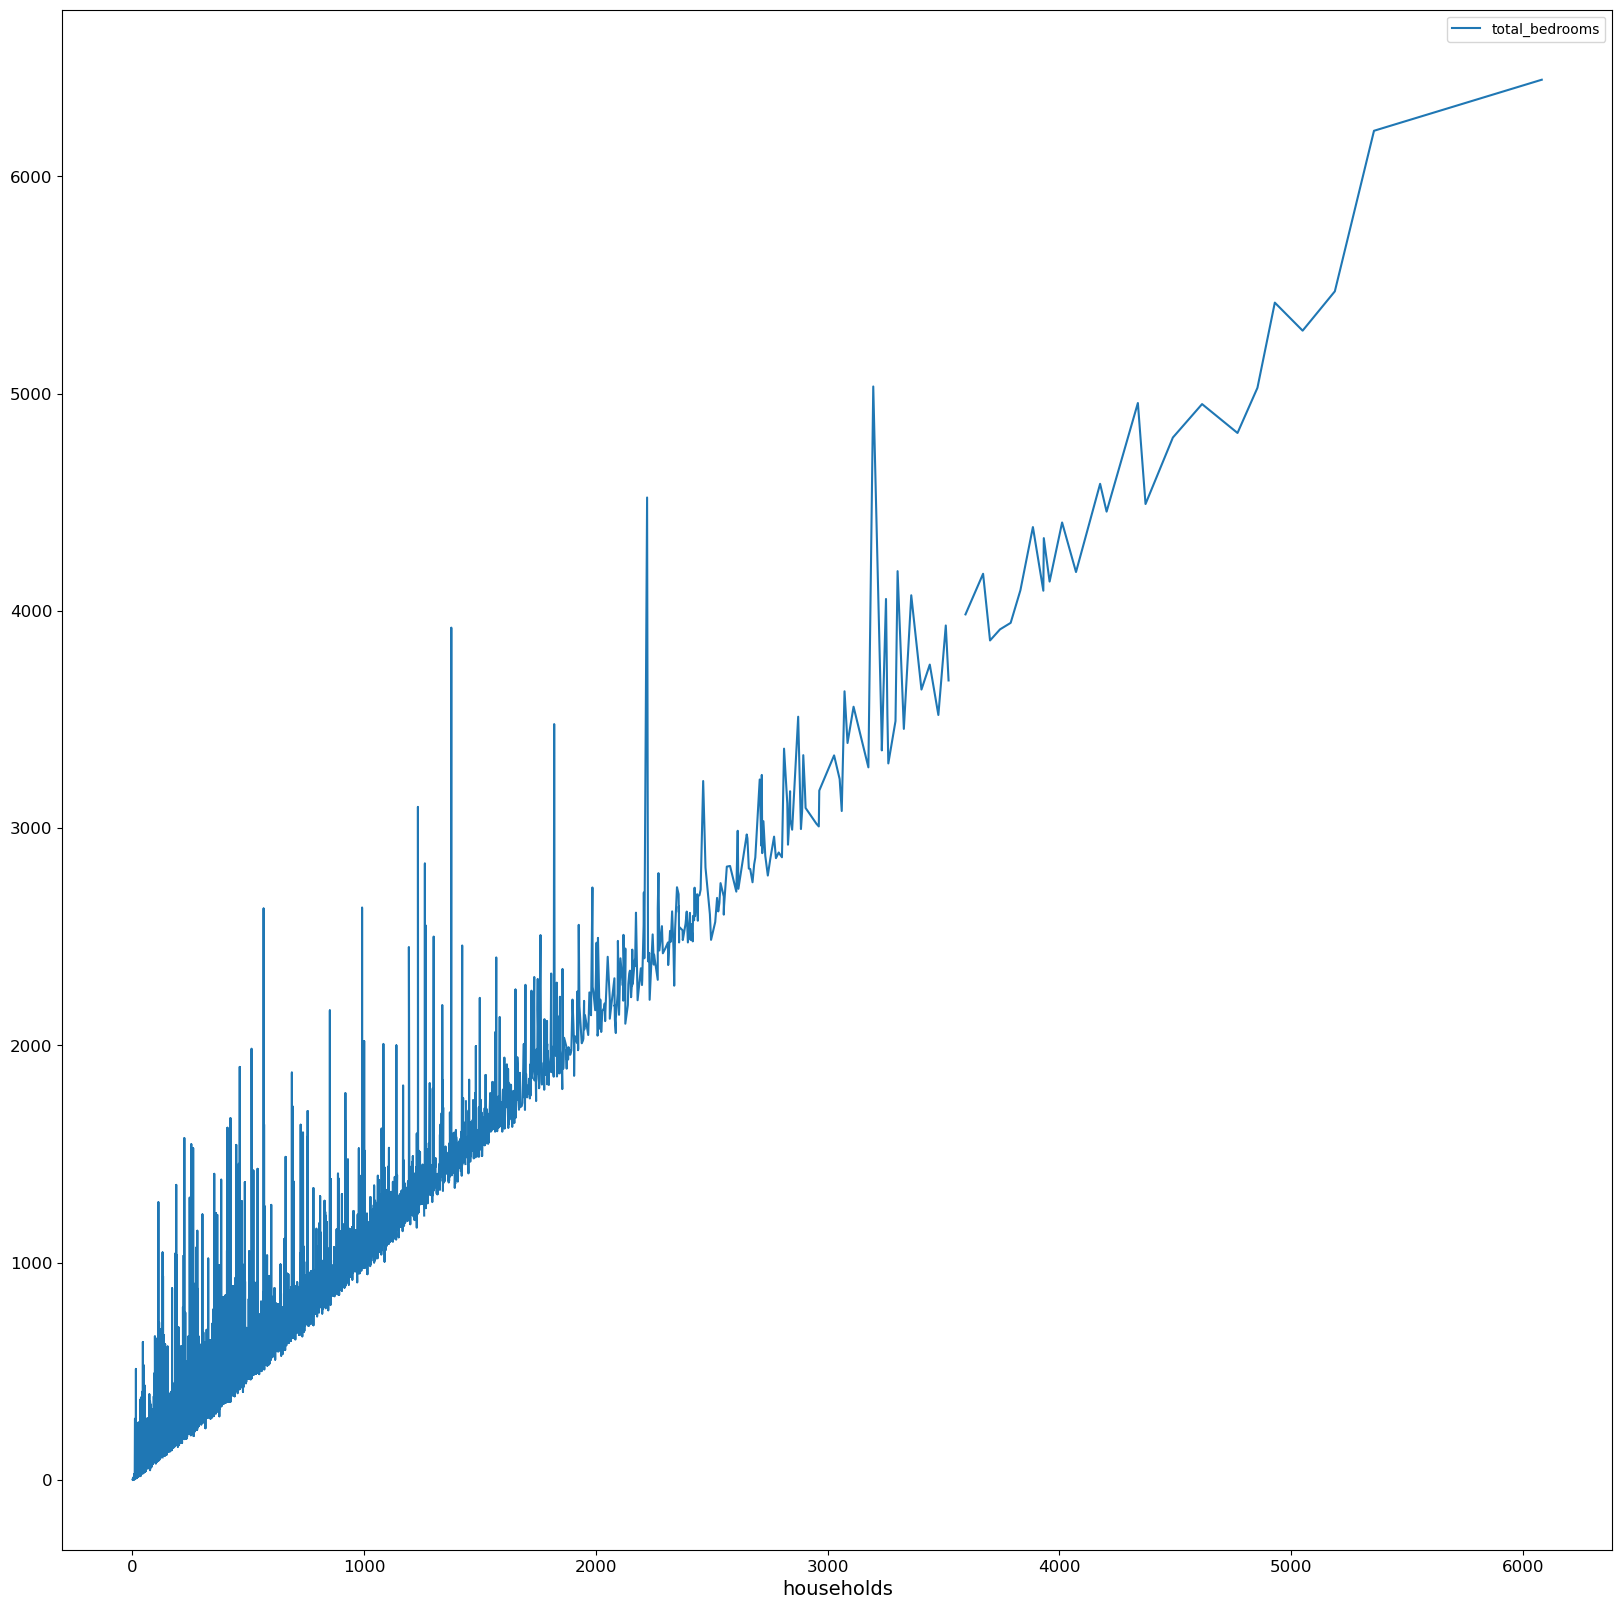

In [8]:
by_households.plot(x='households',y='total_bedrooms',figsize=(20,20))

Doesn't really make sense to draw a **line** here visually.  Increasing number
of households **generally** increases number of bedrooms, but a small increase
in one does not with perfect reliability predict a small increase in the other.
Hence the zigzagging.

Also, for similar reasons, possibly not a function.  Two different
communities **might** have exactly the same number of hoiuseholds,
bit not exactly the same number of total bedrooms.

Let's do some binning: we'll round off to the nearest 50 and take the mean number
of bedrooms for each bin.

In [85]:
import pandas as pd

# Bins: households rounded off to the nearest 50
by_households['Households Level'] = \
         by_households['households'].apply(lambda x: 50 * (x // 50))
bh_pivot = pd.pivot_table(by_households, 
                    values='total_bedrooms',
                    index= 'Households Level',
                    aggfunc=np.mean)
bh_pivot

,total_bedrooms
Households Level,
0.0,46.720365
50.0,97.358314
100.0,161.683043
150.0,199.337266
200.0,245.075658
...,...
4900.0,5419.000000
5050.0,5290.000000
5150.0,5471.000000


The newly created pivot table now produces a plot that tells the story:  Exception  for a few bins in the middle range of households, the average number of bedrooms in this data set is very close to 1.  (The line we're plotting is y=x).

Text(0, 0.5, 'Bedrooms')

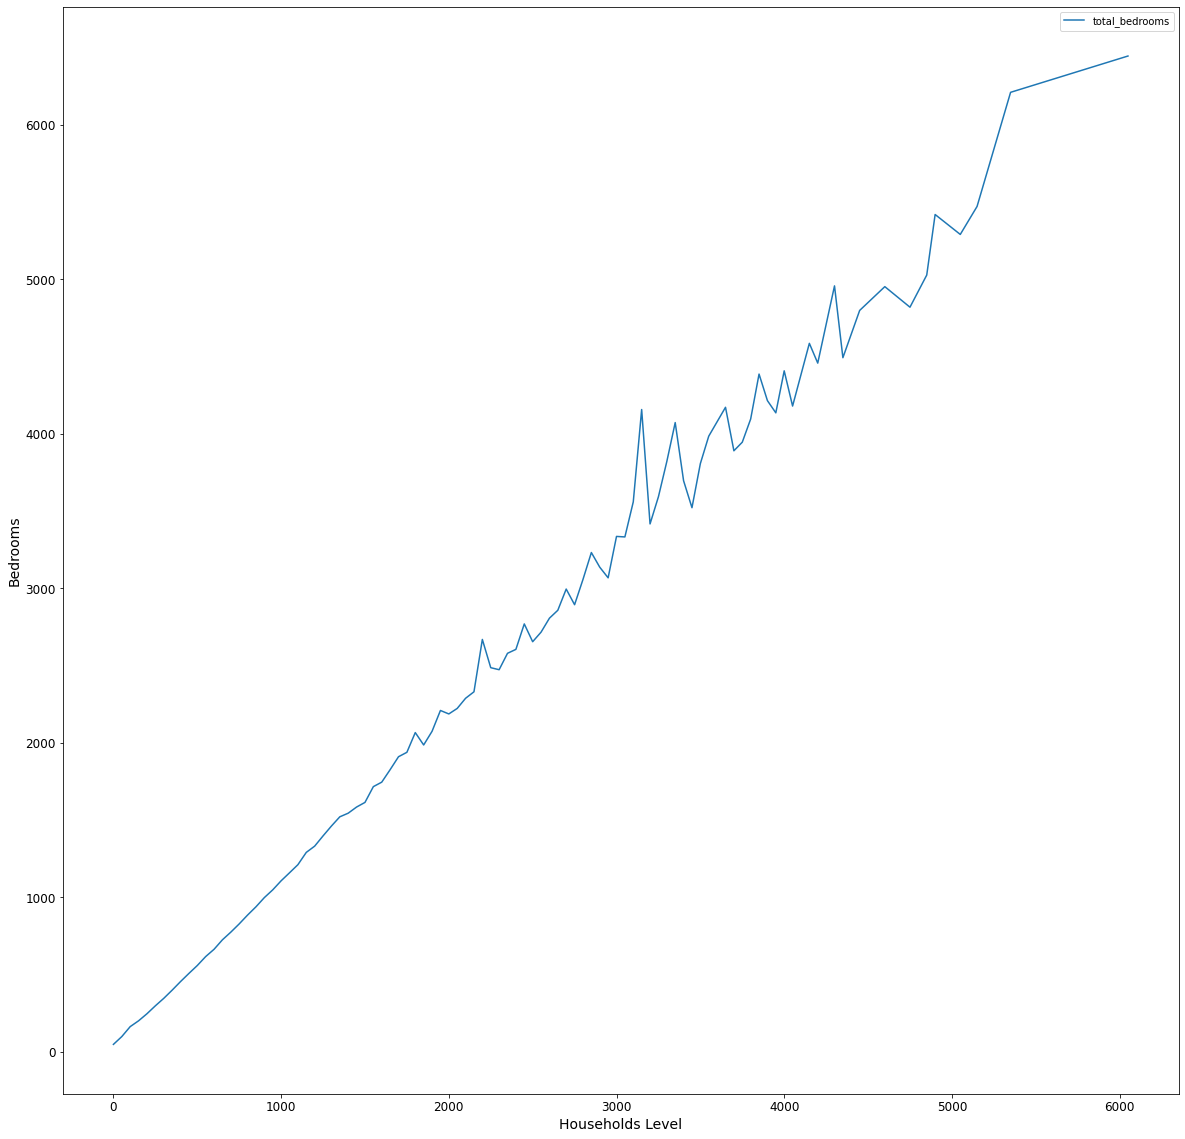

In [86]:
#plt.plot(Z_scale[:,0],Z_scale[:,1])
#bh_pivot.plot(x='households_level',y='index')
fig, ax = plt.subplots(1,1)
bh_pivot.plot(figsize=(20,20),ax=ax)
plt.ylabel('Bedrooms')

## The Regression Problem

In [54]:
from sklearn.metrics import r2_score, mean_squared_error

sensible_df = df[df.median_house_value < df.median_house_value.max()]
income_train, income_test, y_train,y_test = train_test_split(sensible_df[['median_income']],
                                                             sensible_df[['median_house_value']])
Xsample = income_train[["median_income"]]

Ysample = y_train # income_train[["median_house_value"]]

lin1 = linear_model.LinearRegression()

lin1.fit(Xsample,Ysample)

vals_lin = lin1.predict(income_test[["median_income"]])
lin_mse = mean_squared_error(y_test["median_house_value"],vals_lin)

lin_r2 = r2_score(y_test[["median_house_value"]], vals_lin)

np.sqrt(lin_mse),lin_r2

(75058.8871634229, 0.41254162089588353)

In [14]:
len(sensible_df),len(df)

(19675, 20640)

Do a linear regression trying to predict median_house_value from median_income.

Separate data into training and test (90/10).

Do a single figure that shows both a scatterplot of all the training points **and** the line discovered by training the regression model, which may not pass through any of the training points.  This will require finding the model parameters on the trained LinearRegression instance. See the simple_regression NB.

#### Train the regression model

In [4]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
## Your training code here

#### Draw the plot

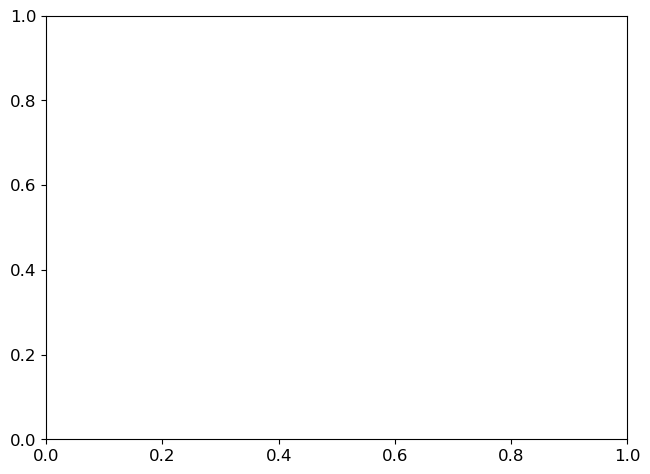

In [5]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(7.5,5.5))
import matplotlib.colors as mcolors

# JMG suggest you draw the data dots and the model line in differemt colors.
# How about these?
tblue = mcolors.TABLEAU_COLORS['tab:blue']
tred = mcolors.TABLEAU_COLORS['tab:red']

## Your code here

#### Evaluate the model

Compute the $R^2$ score and the Mean Squared Error (MSE) on the test data

In [ ]:
## Your code here

#### Answer a question

Does your model acheive baseline performance, as defined in simple_regression notebook?


Note: Here is a way to find the worst errors in the data set (pos, neg): 

```python
(y_predicted - y_test).max(),(y_test - y_predicted).max()
```

Can you think of a way to build a better model?

In [3]:
res = [(let,num) for let in  'abc' for num in '314']

In [6]:
res

[('a', '3'),
 ('a', '1'),
 ('a', '4'),
 ('b', '3'),
 ('b', '1'),
 ('b', '4'),
 ('c', '3'),
 ('c', '1'),
 ('c', '4')]

In [5]:
list(zip(*res))

[('a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'c'),
 ('3', '1', '4', '3', '1', '4', '3', '1', '4')]